# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 4
*gelöst von Stollmayer Max*

### Aufgabe 1

Zusatzaufgabe

### Aufgabe 2

Zu implementieren ist die Adams-Bashforth-Methode.

#### Definitions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [12.8, 7.2]

In [2]:
def forward_euler(f, y0, t):
    '''
    Returns list of function values approximated with the forward Euler method.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value
    t .... grid of input values
    '''
    
    N = len(t)
    h = (t[-1] - t[0]) / N

    if isinstance(y0, int):
        y = np.zeros(N)
    else:
        y = np.zeros((N, np.size(y0)))
    y[0] = y0

    for n in range(0, N-1):
        y[n+1] = y[n] + h * f(y[n], t[n])

    return y

In [3]:
def rk4(f, y0, t):
    '''
    Returns list of function values approximated with the Runge-Kutta method of 4th order.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value
    t .... grid of input values
    '''
    
    N = len(t)
    h = (t[-1] - t[0]) / N
    
    if isinstance(y0, int):
        y = np.zeros(N)
    else:
        y = np.zeros((N, np.size(y0)))
    y[0] = y0
    
    for n in range(0, N-1):
        k1 = f(y[n], t[n])
        k2 = f(y[n] + h/2 * k1, t[n] + h/2)
        k3 = f(y[n] + h/2 * k1, t[n] + h/2)
        k4 = f(y[n] + h/2 * k1, t[n] + h/2)
        y[n+1] = y[n] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return y

In [4]:
def adams_bashforth(f, vals, t):
    '''
    Returns list of function values approximated with the Adams-Bashforth method.

    f ...... function of ODE y' = f(y, t)
    vals ... initial values (y0, y1, y2, y3)
    t ...... grid of input values
    '''
    
    N = len(t)
    h = (t[-1] - t[0]) / N
    
    if isinstance(vals[0], int):
        y = np.zeros(N)
    else:
        y = np.zeros((N, np.size(vals[0])))
        
    for i in range(0,4):
        y[i] = vals[i]
    
    for n in range(0, N-4):
        y[n+4] = y[n+3] + h/34 * (55*f(y[n+3], t[n+3]) - 59*f(y[n+2], t[n+2]) + 37*f(y[n+1], t[n+1]) - 9*f(y[n], t[n]))
        
    return y

#### Test
$y'(t) = -2\ t\ y(t)^2, \quad y(0) = 1$

In [50]:
def f(y, t):
    return -2 * t * y**2

def exact(t):
    return 1/(t**2 + 1)

def error(y):
    return np.abs(y - exact(tN))

def conv(y, t):
    return np.log(np.abs(y[1] - exact(t[1])) / np.abs(y[2] - exact(t[2]))) / np.log(np.abs(y[0] - exact(t[0])) / np.abs(y[1] - exact(t[1])))

y0 = 1
t0 = 0
tN = 1

In [62]:
steps = (10, 20, 40, 80, 160, 320)
e1 = ()
e2 = ()
e3 = ()
c1 = ()
c2 = ()
c3 = ()
for N in steps:
    h = 1/N
    t = t0 + h * np.arange(N+1)
    
    vals1 = [exact(t[i]) for i in range(0, 4)]
    vals2 = rk4(f, y0, t)[0:4]
    vals3 = forward_euler(f, y0, t)[0:4]
    
    y1 = adams_bashforth(f, vals1, t)
    e1 += (error(y1[-1]),)
    c1 += (conv((y1[-3], y1[-2], y1[-1]), (t[-3], t[-2], t[-1])),)
    
    y2 = adams_bashforth(f, vals2, t)
    e2 += (error(y2[-1]),)
    c2 += (conv((y2[-3], y2[-2], y2[-1]), (t[-3], t[-2], t[-1])),)
    
    y3 = adams_bashforth(f, vals3, t)
    e3 += (error(y3[-1]),)
    c3 += (conv((y3[-3], y3[-2], y3[-1]), (t[-3], t[-2], t[-1])),)

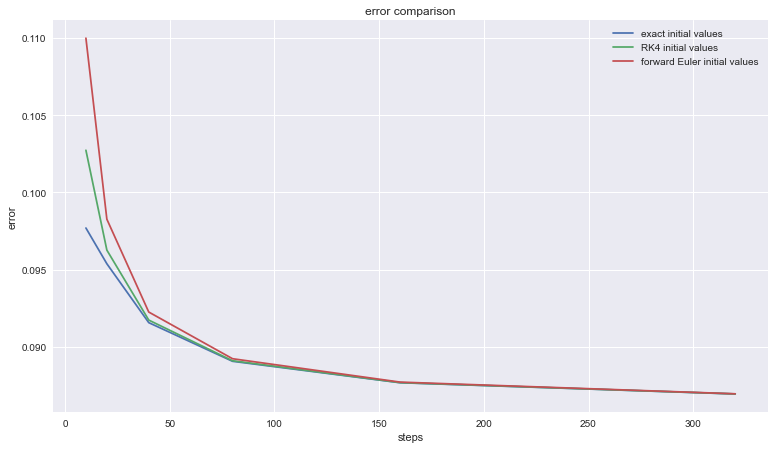

In [63]:
plt.plot(steps, e1, label="exact initial values")
plt.plot(steps, e2, label="RK4 initial values")
plt.plot(steps, e3, label="forward Euler initial values")
plt.title("error comparison")
plt.xlabel("steps")
plt.ylabel("error")
plt.legend()
plt.show()

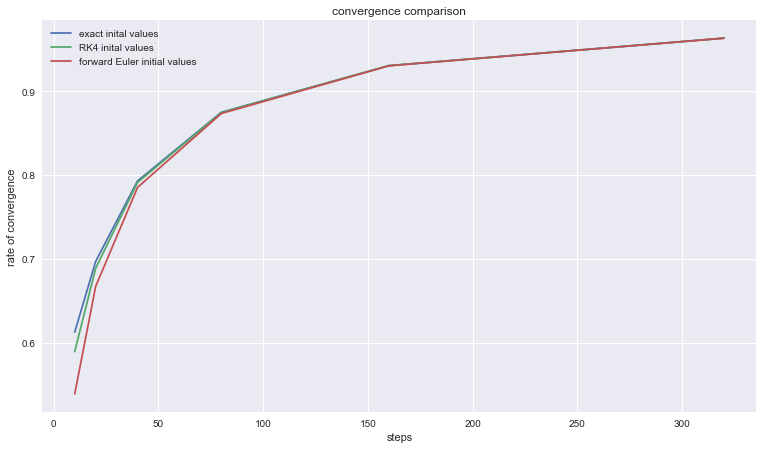

In [65]:
plt.plot(steps, c1, label="exact inital values")
plt.plot(steps, c2, label="RK4 inital values")
plt.plot(steps, c3, label="forward Euler initial values")
plt.title("convergence comparison")
plt.xlabel("steps")
plt.ylabel("rate of convergence")
plt.legend()
plt.show()